## PCA

In [1]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
Xtrain_test, ytrain_test = fetch_openml(name = 'mnist_784', version=1, return_X_y=True)

Xcentered = Xtrain_test - Xtrain_test.mean(axis = 1).reshape(-1, 1)

## Compute pricipal component axis
U, s, Vt = np.linalg.svd(Xcentered)

In [3]:
##
from sklearn.decomposition import PCA, IncrementalPCA

In [10]:
pca = PCA(n_components=200)

In [11]:
Xd = pca.fit_transform(Xtrain_test)

In [12]:
Xdecompress = pca.inverse_transform(Xd)

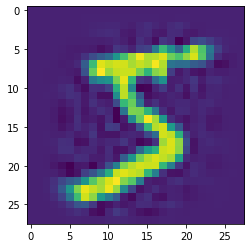

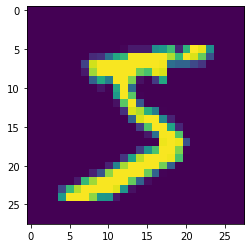

In [13]:
import matplotlib.pyplot as plt

plt.imshow(Xdecompress[0].reshape(28, 28))
plt.show()
plt.imshow(Xtrain_test[0].reshape(28, 28))
plt.show()

### Compute PCS using incremental

In [31]:
ipca = IncrementalPCA(n_components=200)

for ind in range(0, len(Xtrain_test), 1000):
    ipca.partial_fit(Xtrain_test[ind:ind+1000,:])

In [32]:
X0 = ipca.transform(Xtrain_test[0].reshape(1, -1))

In [33]:
X0_dec = ipca.inverse_transform(X0)

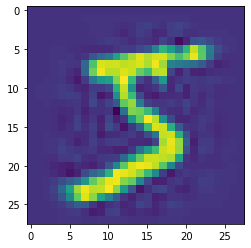

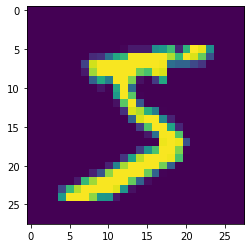

In [34]:
plt.imshow(X0_dec[0].reshape(28, 28))
plt.show()
plt.imshow(Xtrain_test[0].reshape(28, 28))
plt.show()

In [46]:
## Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=200, kernel='rbf', fit_inverse_transform=True)
Xcompress_kpca = kpca.fit_transform(Xtrain_test[:10000, :])

In [47]:
print(Xcompress_kpca.shape)

(10000, 200)


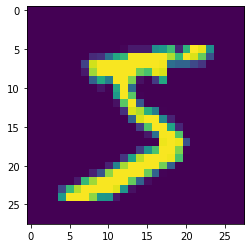

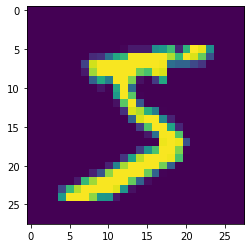

In [48]:
Xdecompress = kpca.inverse_transform(Xcompress_kpca)

plt.imshow(Xtrain_test[0].reshape(28, 28))
plt.show()
plt.imshow(Xdecompress[0].reshape(28, 28))
plt.show()

## Question 1 . 
We reduce the dataset dimensionality because of:  
1. The more features, the more training times.  
However, There are information loss in dimensionality reduction process leading to the reduction of the model performance (though, in some case it can slightly better).

## Question 2  
The more dimension, the more sparse between the data meaning that it needs more instances in the feature space to have sufficient density, otherwise the model will tend to overfit. 

## Question 3  
It depends on the algorithm used in reducing dimenson. For example:  
* linear PCA can reverse the operation directly using matrix multiplication.
* kernel PCA require another supervised model to predict the reverse operation to its original form.

## Question 4  
PCA can be used to reduct the dim with highly nonlinear with the help of kernel trick, which maps the input instances to higher dimension space.

## Question 5  
It depends on the distribution of the data, but it always less than 1,000.

## Question 6  
* Vanilla PCA is the full function but slowest method, if the size of the data is lower than 500, we should use this method.
* Incremental PCA allows us to perform PCA on the subset of the data, which is very useful on the on-line training.
* Randomized PCA is always used if the data size is large and the selected n components is lower than 80% of the data size.  
* Kernel PCA is used when the data is highly non-linear.

## Question 7  
For linear PCA, we can evaluate the performance of dimensionality reduction using explained variance ratio which explained the information loss.  
For non-linear PCA, we can evaluate the performance of the dim reduction by evaluating the performance of the full pipeline. 

## Question 8  
No, the purpose of the dimensionality reduction is to reduce the dim while preserve the information as much as possible. If we chain more dim reduction algorithms the information will be more loss.

## Question 9  

In [4]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
import time

In [5]:
X, y = fetch_openml(name='mnist_784', return_X_y=True, version = 1)

In [56]:
Xtrain, Xtest = X[:60000], X[60000:]
ytrain, ytest = y[:60000], y[60000:]

In [62]:
print(Xtrain.shape)

(60000, 784)


In [64]:
full_clf = RandomForestClassifier()

st = time.time()
full_clf.fit(Xtrain, ytrain)
print(f'elapsed time : {time.time() - st}')

full_clf.score(Xtest, ytest)

elapsed time : 63.00208878517151


0.9705

In [58]:
pca = PCA(n_components=0.95)

st = time.time()
Xtrain_reduc = pca.fit_transform(Xtrain)
print(f'reduction time : {time.time() - st}')
clf.fit(Xtrain_reduc, ytrain)
print(f'elapsed time : {time.time() - st}')

reduction time : 13.990907907485962
elapsed time : 187.28277707099915


In [59]:
print(Xtrain_reduc.shape)

(60000, 154)


In [61]:
clf.score(pca.transform(Xtest), ytest)

0.9481

In [68]:
print(Xtrain_reduc)

[[ 123.93258866 -312.67426202  -24.51405176 ...   55.01899792
   -20.08327427   39.58995229]
 [1011.71837587 -294.85703827  596.33956104 ...    7.24129874
   -12.45780869  -12.7432306 ]
 [ -51.84960805  392.17315286 -188.50974943 ...  -54.19582221
    48.47979747  -73.27826256]
 ...
 [-178.0534496   160.07821109 -257.61308227 ...   55.54485537
    87.99883556   -5.78979735]
 [ 130.60607208   -5.59193642  513.85867395 ...   23.30835402
     5.06237836  -65.26525587]
 [-173.43595244  -24.71880226  556.01889393 ...   52.4956069
    12.63192292  -45.74001227]]


## Question 10

In [1]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA

In [6]:
Xplot = X[:10000]
yplot = y[:10000]

In [7]:
tsne = TSNE(n_components = 2)
Xplot_reduc = tsne.fit_transform(Xplot) 

In [8]:
import matplotlib.pyplot as plt

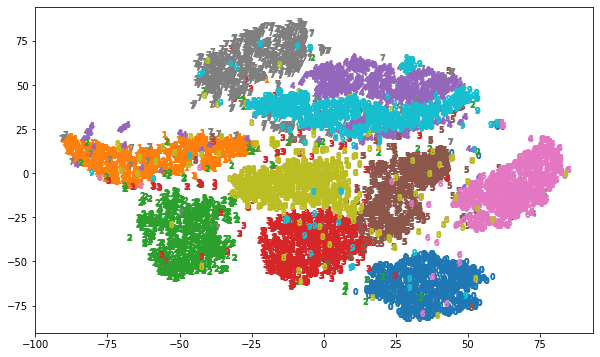

In [16]:

fig = plt.figure(figsize=(10, 6))

for i in range(10):

    plt.scatter(
        Xplot_reduc[yplot == str(i),0], 
        Xplot_reduc[yplot == str(i), 1], 
        marker=f'${i}$')

In [17]:
pca = PCA(n_components=2)
Xplot_pca = pca.fit_transform(Xplot)

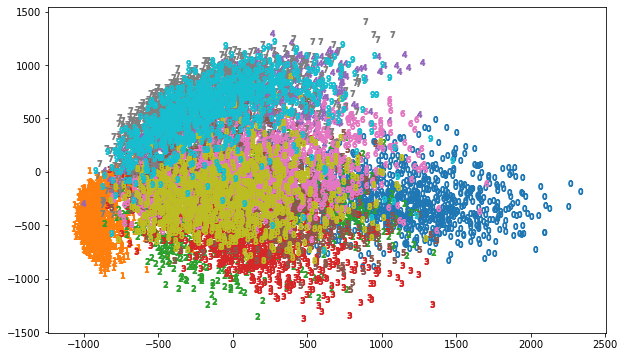

In [18]:

fig = plt.figure(figsize=(10, 6))

for i in range(10):

    plt.scatter(
        Xplot_pca[yplot == str(i),0], 
        Xplot_pca[yplot == str(i), 1], 
        marker=f'${i}$')

In [19]:
lle = LocallyLinearEmbedding(n_components=2)
Xplot_lle = lle.fit_transform(Xplot)

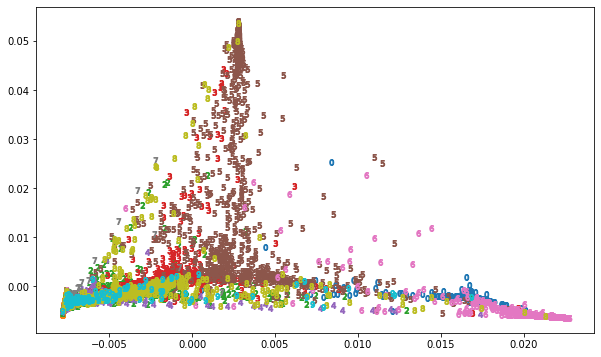

In [20]:

fig = plt.figure(figsize=(10, 6))

for i in range(10):

    plt.scatter(
        Xplot_lle[yplot == str(i),0], 
        Xplot_lle[yplot == str(i), 1], 
        marker=f'${i}$')